# Demo Z2 Self-Attention

In this demo, we will analyze the equivariance properties of (conventional) z2 self-attention models.

First, we will demonstrate the translation equivariance of the model and, subsequently, we will perform an analysis into the rotation and flipping equivariance properties of the model.

## Importing Libraries
Add the library to the system path via the relative folder structure:

In [1]:
import os,sys
g_selfatt_source =  os.path.join(os.getcwd(),'..')
if g_selfatt_source not in sys.path:
    sys.path.append(g_selfatt_source)

Import the necessary libraries:

In [2]:
# torch
import torch
import torch.nn as nn
# project
import g_selfatt
# other
from matplotlib import pyplot as plt

## Z2 Self-Attention Layers

In what follows we take:

* a random noise image f as input
* apply a sequence of z2 self-attention layers to it f -> N(f)
* translate the input (T(f)) via the action of the translation group on f and send it through the same sequence of layers and (T(f) -> N(R(f)))
* then we test the equivariance property T'(N(f))=N(T(f)) In the above T denotes the translation operator of 2D images, and T' denotes the translation operator on feature maps.

Now, let us create a net with two self-attention layers, with a total of 3 ** 2 heads:

### The input feature map

In [3]:
Nxy = 15 # This spatial dimension
N_in = 10 # This many feature channels
B = 4 # Batch size
# For now we work with a placeholder
inputs = torch.randn([B,N_in,Nxy,Nxy], dtype=torch.float32)
inputs[:,:, :4, :] = 0.0 
inputs[:,:, :, :4] = 0.0 
inputs[:,:, -4:,:] = 0.0 
inputs[:,:, :, -4:] = 0.0 

### Attention Layers

In [8]:
# Layer parameters
num_heads = 3 ** 2

# construct layers
sa_1 = g_selfatt.nn.RdSelfAttention(N_in, N_in, N_in * 2, num_heads, Nxy, 0.0)
sa_2 = g_selfatt.nn.RdSelfAttention(N_in * 2, N_in, N_in * 4, num_heads, Nxy, 0.0)

### Test the network - Translation Equivariance

We create random noise input and translated noise:

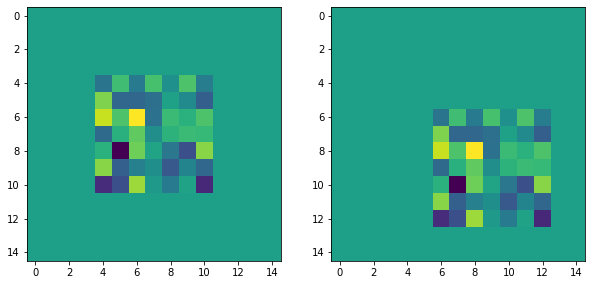

In [9]:
input_tensor = inputs
input_tensor_trans = torch.roll(inputs, (2,2), dims=(-2,-1))

f,axs = plt.subplots(1,2,figsize=(10,10))
plt.subplot(1,2,1);plt.imshow(input_tensor.numpy()[0, 0,:, :])
plt.subplot(1,2,2);plt.imshow(input_tensor_trans.numpy()[0,0,:,:,])
plt.show()

Pass the original random signal to the network and then its translated version

In [10]:
out_1 = sa_1(input_tensor)
out_2 = sa_2(out_1)

out_1_trans = sa_1(input_tensor_trans)
out_2_trans = sa_2(out_1_trans)

Let's compare the results

First layer:


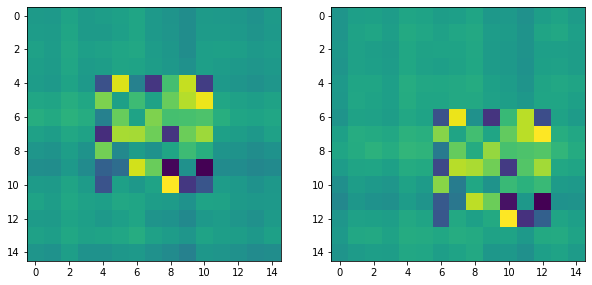

Second layer:


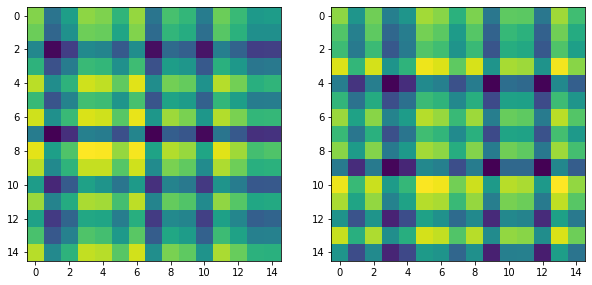

In [11]:
print('First layer:')
f,axs = plt.subplots(1,2,figsize=(10,10))
plt.subplot(1,2,1);plt.imshow(out_1.detach().numpy()[0, 0,:, :])
plt.subplot(1,2,2);plt.imshow(out_1_trans.detach().numpy()[0,0,:,:,])
plt.show()

print('Second layer:')
f,axs = plt.subplots(1,2,figsize=(10,10))
plt.subplot(1,2,1);plt.imshow(out_2.detach().numpy()[0, 0,:, :])
plt.subplot(1,2,2);plt.imshow(out_2_trans.detach().numpy()[0,0,:,:,])
plt.show()

### Test the network - Roration Equivariance

Now, let's analyze what occurs if the input image is rotated. Lets first see the input

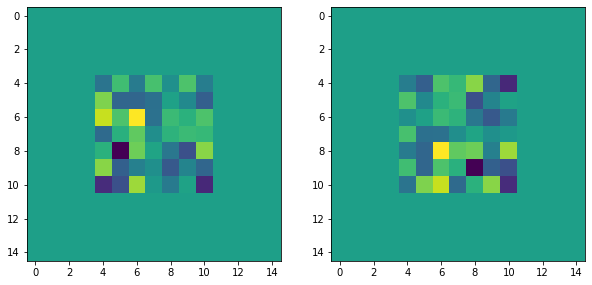

In [12]:
input_tensor = inputs
input_tensor_90 = inputs.rot90(k=1, dims=[-2,-1])

f,axs = plt.subplots(1,2,figsize=(10,10))
plt.subplot(1,2,1);plt.imshow(input_tensor.numpy()[0, 0,:, :])
plt.subplot(1,2,2);plt.imshow(input_tensor_90.numpy()[0,0,:,:,]);
plt.show()

Pass the original random signal to the network and then its rotated version

In [13]:
out_1 = sa_1(input_tensor)
out_2 = sa_2(out_1)

out_1_90 = sa_1(input_tensor_90)
out_2_90 = sa_2(out_1_90)

Let's compare the results

First layer:


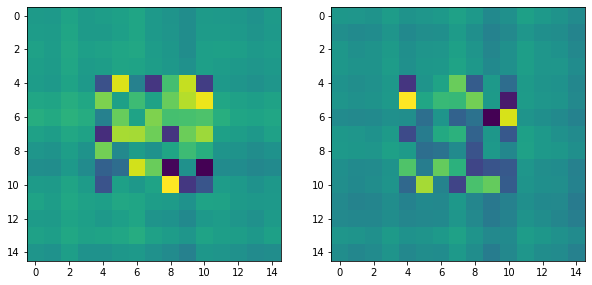

Second layer:


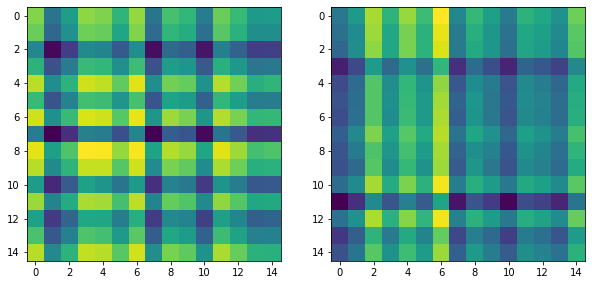

In [14]:
print('First layer:')
f,axs = plt.subplots(1,2,figsize=(10,10))
plt.subplot(1,2,1);plt.imshow(out_1.detach().numpy()[0, 0,:, :])
plt.subplot(1,2,2);plt.imshow(out_1_90.detach().numpy()[0,0,:,:,])
plt.show()

print('Second layer:')
f,axs = plt.subplots(1,2,figsize=(10,10))
plt.subplot(1,2,1);plt.imshow(out_2.detach().numpy()[0, 0,:, :])
plt.subplot(1,2,2);plt.imshow(out_2_90.detach().numpy()[0,0,:,:,])
plt.show()

As we can see, the responses are very different for rotated versions of the same image.

## Important!
*please check the other notebooks in this folder to see how equivariant self-attention can be used.